<a href="https://colab.research.google.com/github/Sebastianwhc/Vision-Artificial/blob/main/Sampling_and_quantification_of_digital_images_II_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Processing with Python: Sampling and Quantifying Digital Images

### How high definition is high definition?

In this notebook, we will explore how image resolution is represented in computer vision. More specifically, we will look at how spatial resolution and intensity value discretization can affect overall image quality.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imshow, imread

We must first define what image sampling is. **Image sampling** involves taking the image value at regular spatial intervals. The length of the intervals defines the spatial resolution of the image.

To better explain this, let us try sampling an analog image of a circle where `N` is the number of pixels on the side of the image.

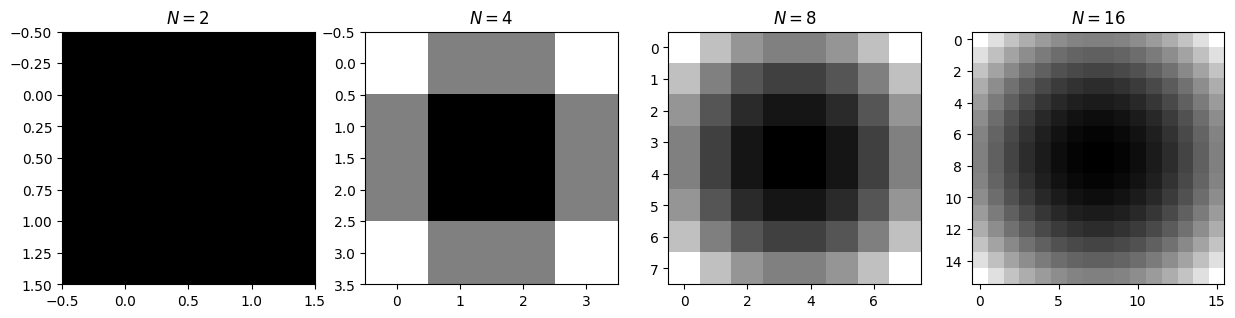

In [ ]:
def circle_image(x, y):
    X, Y = np.meshgrid(x, y)
    return X**2 + Y**2

factors = 2**np.arange(1, 5)
fig, ax = plt.subplots(1, len(factors), figsize=(15, 4))
for i, N in enumerate(factors):
    image = circle_image(np.linspace(-1, 1, num=N), np.linspace(-1, 1, num=N))
    ax[i].imshow(image, cmap='gray')
    ax[i].set_title(f'$N = {N}$')

As we can see, the image resolution is better and the dots are much denser as `N` increases. This means that as we increase the number of pixels in the image, we can better represent an analog object in a digital image.

Let's try this on a real image of a pizza.

In [ ]:
pizza = imread('/content/drive/MyDrive/pizza.jpg')

(2736, 3197, 3)


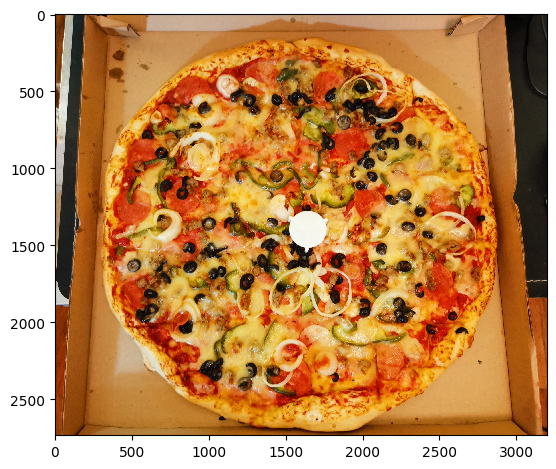

In [ ]:
imshow(pizza);
print(pizza.shape)

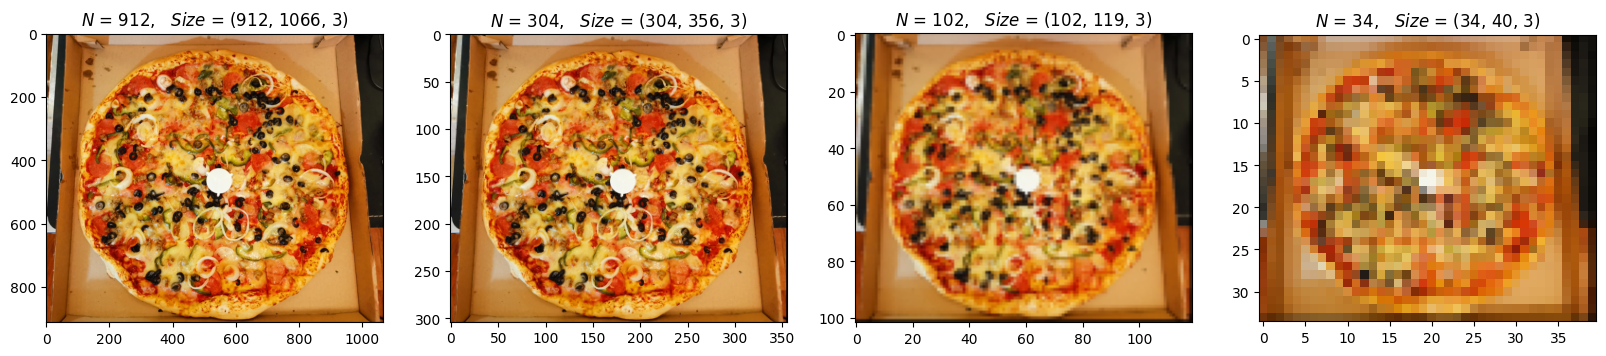

In [ ]:
from skimage.transform import downscale_local_mean
factors = 3**np.arange(1, 5)
figure, axis = plt.subplots(1, len(factors), figsize=(20, 6))
for factor, ax in zip(factors, axis):
    image = downscale_local_mean(pizza,
                                 factors=(factor, factor, 1)).astype(int)
    ax.imshow(image)
    ax.set_title(f'$N$ = {image.shape[0]},   $Size$ = {image.shape}')

In the first two images we can see that there is not much difference. This means that unless we need to enlarge the image, we do not need a higher resolution to better understand the details of the image.

However, as we downsample the spatial resolution of the image even further, it becomes clear that the image is no longer clear. A lot of information is lost and the digital image cannot fully represent the analog object.


The next concept we need to understand is **image quantization**. Image quantization involves discretizing the intensity values ​​of the analog image.

To demonstrate this, let us try to discretize an analog image of a circle where `k` is the number of bits representing an intensity value.

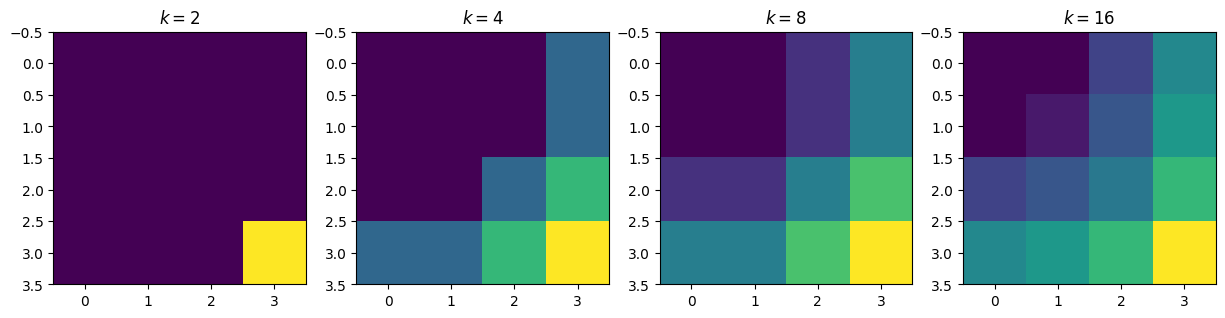

In [ ]:
def circle_image(x, y):
    X, Y = np.meshgrid(x, y)
    return X**2 + Y**2

factors = 2**np.arange(1, 5)
circ_image = circle_image(np.linspace(0, 1, num=4),
                          np.linspace(0, 1, num=4))
fig, ax = plt.subplots(1, len(factors), figsize=(15, 4))
for i, k in enumerate(factors):
    bins = np.linspace(0, circ_image.max(), k)
    image = np.digitize(circ_image, bins)
    image = np.vectorize(bins.tolist().__getitem__)(image-1)
    ax[i].imshow(image)
    ax[i].set_title(f'$k = {k}$')

As we can see, the color representation of the image is much better as `k` increases. This means that as we increase the number of discrete values ​​representing the intensity values ​​of the image in the image, the better we can represent an analog object in a digital image.

Again, let's try this on the pizza image.

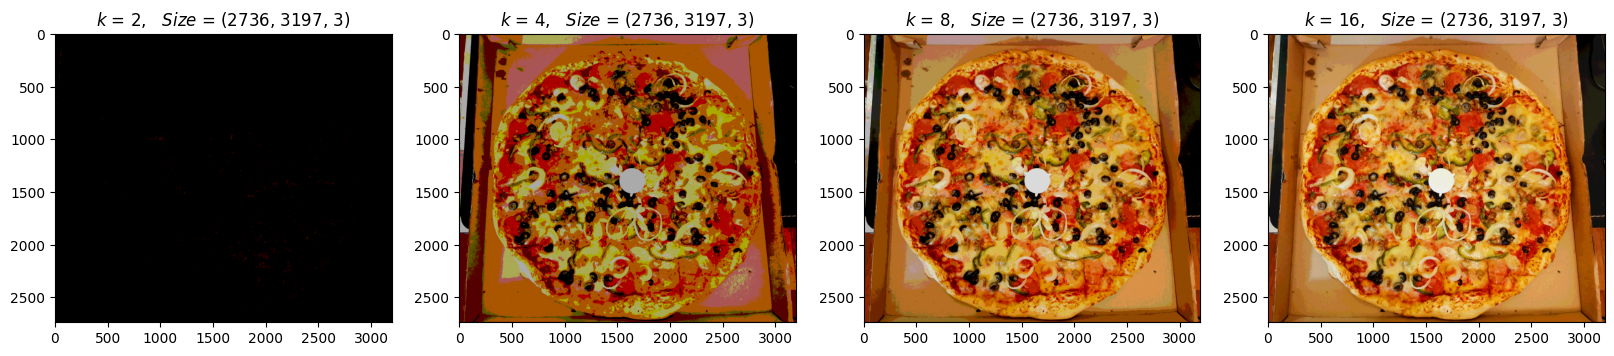

In [ ]:
factors = 2**np.arange(1, 5)
figure, axis = plt.subplots(1, len(factors), figsize=(20, 6))
for k, ax in zip(factors, axis):
    bins = np.linspace(0, pizza.max(), k)
    image = np.digitize(pizza, bins)
    image = (np.vectorize(bins.tolist().__getitem__)
                         (image-1).astype(int))
    ax.imshow(image)
    ax.set_title(f'$k$ = {k},   $Size$ = {image.shape}')

In the lower spectrum, we can see that as we further decrease the discretization of the image, the degradation of image quality becomes more apparent. This reaches the point where the digital image can no longer represent the various color tones of the analog object due to the limited range of intensity values.

In the upper spectrum, we can see that there is not much difference. This means that there is a limit to the number of discrete intensity values ​​that the human eye can perceive. If we further increase the number of discrete intensity values, there will be little to no difference in image quality.

#### In summary

We have explored how image quality can be improved and degraded by image sampling and quantization. Too little image sampling or quantization can drastically degrade image quality, while too much may not produce any incremental improvement in image quality.